In [1]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

path_results = "/develop/results/spie_journal_2023"
exp_name = "new_baseline"

Using MPI version 4.0, 1 processes


Global seed set to 1337


## 1. Evaluate loss.

In [2]:
folder_path = os.path.join(path_results, exp_name)
res_0 = eval.gather_loss(folder_path)
res_1 = eval.gather_loss(folder_path + "_1")
res_2 = eval.gather_loss(folder_path + "_2")

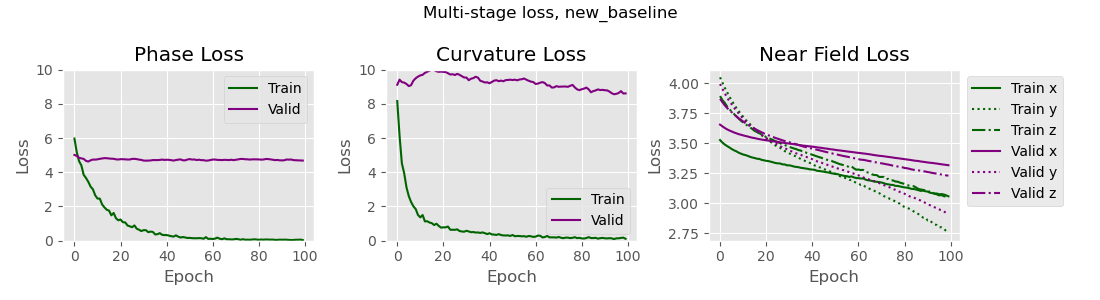

In [10]:
def plot_loss(loss_0, loss_1, loss_2, title, save_fig=False):
    
    plt.style.use("ggplot")
    
    fig, ax = plt.subplots(1, 3, figsize = (11, 3))
    
    fig.suptitle("Multi-stage loss, " + title)
        
    lterms = ['Phase Loss', 'Curvature Loss', 'Near Field Loss'] # near field: alpha, phase: gamma, derivs: delta
    labels = ["Train", "Valid"]
    linestyles = ['solid', 'dotted', 'dashdot']
    colors = ['darkgreen','purple','#4e88d9'] 
    # train dataset
    x_vals = loss_0['epoch']
    y_vals = loss_0['train_phase_loss']
    x_vals = x_vals[x_vals.index % 2 != 0]
    y_vals = y_vals[y_vals.index % 2 != 0]

    ax[0].plot(x_vals, y_vals, label=labels[0], c=colors[0])
    ax[0].legend()

    x_vals = loss_1['epoch']
    y_vals = loss_1['train_derivative_loss']
    x_vals = x_vals[x_vals.index % 2 != 0]
    y_vals = y_vals[y_vals.index % 2 != 0]
    
    ax[1].plot(x_vals, y_vals, label=labels[0], c=colors[0])
    ax[1].legend()

    x_vals = loss_2['epoch']
    y_vals = loss_2['train_nf_x_loss']
    x_vals = x_vals[x_vals.index % 2 != 0]
    y_vals = y_vals[y_vals.index % 2 != 0]
    
    ax[2].plot(x_vals, y_vals, label=labels[0] + " x", c=colors[0], linestyle=linestyles[0])
    #ax[2].legend()

    x_vals = loss_2['epoch']
    y_vals = loss_2['train_nf_y_loss']
    x_vals = x_vals[x_vals.index % 2 != 0]
    y_vals = y_vals[y_vals.index % 2 != 0]
    
    ax[2].plot(x_vals, y_vals, label=labels[0] + " y", c=colors[0], linestyle=linestyles[1])
    #ax[2].legend()

    x_vals = loss_2['epoch']
    y_vals = loss_2['train_nf_z_loss']
    x_vals = x_vals[x_vals.index % 2 != 0]
    y_vals = y_vals[y_vals.index % 2 != 0]
    
    ax[2].plot(x_vals, y_vals, label=labels[0] + " z", c=colors[0], linestyle=linestyles[2])
    #ax[2].legend()
    
    # Valid dataset
    x_vals = loss_0['epoch']
    y_vals = loss_0['val_phase_loss']
    x_vals = x_vals[x_vals.index % 2 == 0]
    y_vals = y_vals[y_vals.index % 2 == 0]
    
    ax[0].plot(x_vals, y_vals, label=labels[1], c=colors[1])
    ax[0].legend()

    x_vals = loss_1['epoch']
    y_vals = loss_1['val_derivative_loss']
    x_vals = x_vals[x_vals.index % 2 == 0]
    y_vals = y_vals[y_vals.index % 2 == 0]
    
    ax[1].plot(x_vals, y_vals, label=labels[1], c=colors[1])
    ax[1].legend()

    x_vals = loss_2['epoch']
    y_vals = loss_2['val_nf_x_loss']
    x_vals = x_vals[x_vals.index % 2 == 0]
    y_vals = y_vals[y_vals.index % 2 == 0]

    ax[2].plot(x_vals, y_vals, label=labels[1] + " x", c=colors[1], linestyle=linestyles[0])
    #ax[2].legend()

    x_vals = loss_2['epoch']
    y_vals = loss_2['val_nf_y_loss']
    x_vals = x_vals[x_vals.index % 2 == 0]
    y_vals = y_vals[y_vals.index % 2 == 0]
    
    ax[2].plot(x_vals, y_vals, label=labels[1] + " y", c=colors[1], linestyle=linestyles[1])
    #ax[2].legend()

    x_vals = loss_2['epoch']
    y_vals = loss_2['val_nf_z_loss']
    x_vals = x_vals[x_vals.index % 2 == 0]
    y_vals = y_vals[y_vals.index % 2 == 0]
    
    ax[2].plot(x_vals, y_vals, label=labels[1] + " z", c=colors[1], linestyle=linestyles[2])
    ax[2].legend(loc='upper left', bbox_to_anchor=(1,1))

    ax[0].set_ylim([0, 10])
    ax[1].set_ylim([0, 10])
    #ax[2].set_ylim([0, 10])

    ax[0].set_title(lterms[0])
    ax[1].set_title(lterms[1])
    ax[2].set_title(lterms[2])

    ax[0].set_xlabel("Epoch")
    ax[1].set_xlabel("Epoch")
    ax[2].set_xlabel("Epoch")

    ax[0].set_ylabel("Loss")
    ax[1].set_ylabel("Loss")
    ax[2].set_ylabel("Loss")
    
    fig.tight_layout(rect=[0,0,0.98,1])
plot_loss(res_0['loss'], res_1['loss'], res_2['loss'], title=exp_name)

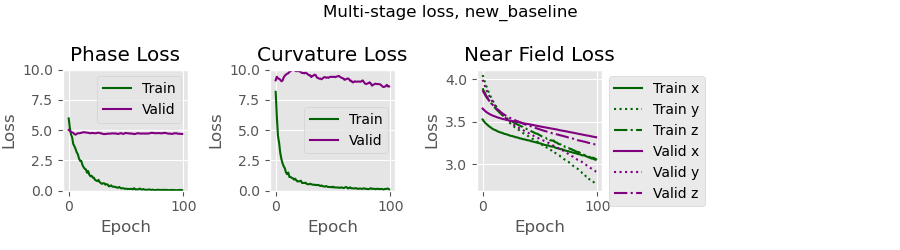

In [3]:
eval.plot_loss(res_0['loss'], res_1['loss'], res_2['loss'], title=exp_name)

## 2. Evaluate other metrics

In [ ]:
phase_folder = os.path.join(path_results, exp_name + "_0")
phase_train_results, phase_valid_results = eval.get_results(phase_folder, "encoder.pkl")

der_folder = os.path.join(path_results, exp_name + "_1")
der_train_results, der_valid_results = eval.get_results(der_folder, "encoder.pkl")

recon_folder = os.path.join(path_results, exp_name + "_2")
recon_train_results, recon_valid_results = eval.get_results(recon_folder, "recon.pkl")

resim_train_results, resim_valid_results = eval.get_results(recon_folder, "resim.pkl")

plt.close("all")

eval.get_regression_plots(phase_train_results, phase_valid_results, der_train_results, der_valid_results, title = "Encoder", save_fig=False)

In [ ]:
recon_train_results['nf_amp_diff'].shape
print(recon_train_results['nf_amp_diff'][80][50][50])
print(recon_valid_results['nf_amp_diff'][80][50][50])

In [ ]:
plt.close("all")

eval.violin_plots(recon_train_results['nf_amp_diff'], recon_train_results['nf_angle_diff'], 
             'Train Dataset', savefig=False)
eval.violin_plots(recon_valid_results['nf_amp_diff'], recon_valid_results['nf_angle_diff'],  
             'Valid Dataset', savefig=False)

In [ ]:
##### get near field truth, recon, and resim values ####

nf_truth_train = resim_train_results['nf_truth']
nf_truth_valid = resim_valid_results['nf_truth']

nf_recon_train = resim_train_results['nf_pred']
nf_recon_valid = resim_valid_results['nf_pred']
import pickle
def get_nf_resim(folder_name, target):
    
    folder_path = os.path.join(folder_name, target + "_info")
    nf_resim = []
    for file in os.listdir(folder_path):
        print(file)
        if "sample" in file:
            resim = pickle.load(open(os.path.join(folder_path,file),"rb"))
            nf_resim.append(resim['near_fields_1550']['ey'])
    return nf_resim

folder_name = os.path.join(path_results, exp_name + "_2")
nf_resim_train = get_nf_resim(folder_name, target = 'train')
nf_resim_valid = get_nf_resim(folder_name, target = 'valid')

In [ ]:
nf_resim_valid

In [ ]:
plt.close("all")

similarity = True
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity, savefig=True)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")

similarity = False
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")       
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, 
           target = "Near Field, Train Dataset", batch=True, savefig = True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, "Near Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=False, idx=6, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=False, idx=0, savefig=True)